# DATA STATISTICS

In [1]:
import pandas as pd
import matplotlib as plt

## Loading the entire dataset into a pandas dataframe

In [89]:
data = pd.DataFrame()
data = pd.read_csv('Datasets/Tweets.csv', encoding = 'utf-8')
data.head()

,Tweet,Sentiment
0,<user> i dunno justin read my mention or not ....,1
1,"because your logic is so dumb , i won't even c...",1
2,""" <user> just put casper in a box ! "" looved t...",1
3,<user> <user> thanks sir > > don't trip lil ma...,1
4,visiting my brother tmr is the bestest birthda...,1


In [13]:
# Finding out how many tweets are in the entire dataset.
print(data.shape)

(2500000, 2)


There are 2.5 million tweets in the dataset.

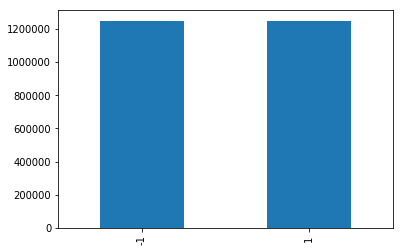

In [15]:
# Examining the distribution of the sentiments in the data

%matplotlib inline

data['Sentiment'].value_counts().plot(kind='bar')

There is a even split of positive to negative sentiment in the data.

## Splitting data into a train and test set

In [17]:
from sklearn.model_selection import train_test_split

In [75]:
def test_train_split(data, train_save, test_save, test_size, random_state):
    
    train,test = train_test_split(data, test_size=test_size, random_state=random_state)
    # important to shuffle the data randomly before making a train/test split
    # removes any bias in the data
    
    #save the data
    train.to_csv(train_save,index=False)
    test.to_csv(test_save,index=False)

In [76]:
test_train_split(data, 'Datasets/Train/Train.csv', 'Datasets/Test/Test.csv', 0.2, 2000)

## Loading the train and test datasets into a pandas dataframe

In [21]:
data_train = pd.DataFrame()
data_train = pd.read_csv('Datasets/Train/Train.csv', encoding = 'utf-8')
data_train.head()

,Tweet,Sentiment
0,got my gym gear on and about to run on the bea...,-1
1,i #believe one day <user> will followback me a...,1
2,<user> you'll be fine trust me,1
3,lexmark 34s0600 e460dw wi-fi duplex monochrome...,-1
4,_race_girl_ i know hun but hey .. we can alway...,-1


In [24]:
# How many tweets are in the train dataset
print(data_train.shape)

(2000000, 2)


There are 2,000,000 tweets in the train set.

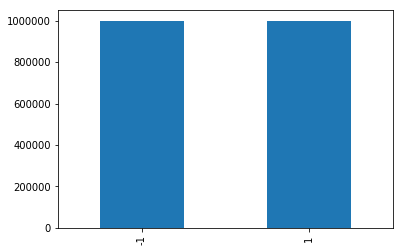

In [26]:
# Examining the distribution of the sentiments in the train set

%matplotlib inline

data_train['Sentiment'].value_counts().plot(kind='bar')

In [22]:
data_test = pd.DataFrame()
data_test = pd.read_csv('Datasets/Test/Test.csv', encoding = 'utf-8')
data_test.head()

,Tweet,Sentiment
0,"ahha , luck , found a bunch of movies that are...",1
1,yes god ... i'm nothing without you ...,1
2,<user> { hug } : o ! i would * love * that . o...,1
3,<user> lucky you it's different for the man le...,1
4,#wisconsinwants1d because we have directioners...,1


In [25]:
# How many tweets are in the test dataset
print(data_test.shape)

(500000, 2)


There are 500,000 tweets in the test set.

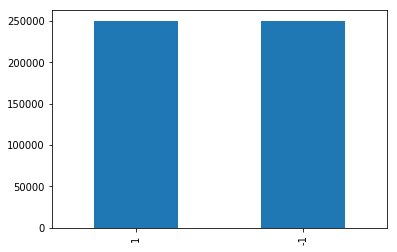

In [28]:
# Verifying that the test set has the same distribution of sentiments as the train set.

%matplotlib inline

data_test['Sentiment'].value_counts().plot(kind='bar')

## Finding the top words associated with positive or negative sentiment

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer

In [143]:
data = pd.DataFrame()
data = pd.read_csv('Datasets/Tweets.csv', encoding = 'utf-8')

Before we can find the top words associated with either positive or negative sentiment, it is imperative to perform some data pre-processing to remove any useless stop words which have no sentiment polarisation, and thus, appear in both positive and negative tweets.

In [144]:
def clean_text(
    string: str, 
    punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~''',
    stop_words=[]) -> str:
    """
    A method to clean text 
    """
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', string)
    
    # Removing words containing numbers
    string = re.sub('\w*\d\w*', '', string)  
    
    # Removing integers
    string = re.sub(r'[0-9]+', '', string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in stop_words])

    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()

    return string

In [167]:
# Obtaining a list of stop words from the 'stopwords.txt' file

with open('stopwords.txt', 'r') as f:
    stop_words = [line.strip() for line in f]
    
# Adding other unimportant words to the stop words list
useless = ['rt','lol','am','oh','hey','follow','wanna','gonna','day', 'night','didnt','tomorrow','morning','guys','girl','tweet','tonight','please','twitter','following','ill']
stop_words.extend(useless)


Removed 'follow' because of its 'Twitter meaning' (getting people to follow certain accounts). It appears frequently in both positive and negative tweets and so has no strong association with either positive or negative sentiment.

Perhaps a controvesial decision to remove 'ill', since it could be referring to having an 'illness'.
However, 'ill' (which has negative connotations) doesn't appear in top 20 negative sentiment words, but appears in top 20 positive words. Therefore, it suggests that the majority of 'ill' infers the meaning of 'I'll' for 'I will',
which are both stop words and should be removed.

In [146]:
X = data.loc[:,'Tweet']
Y = data.loc[:,'Sentiment']

In [149]:
X = [clean_text(text) for text in X]
Y = np.asarray(Y)

In [150]:
# Tokenizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [168]:
# Getting the most frequent words
w_pos = data.loc[data['Sentiment']==1, 'Tweet'].tolist()
w_neg = data.loc[data['Sentiment']==-1, 'Tweet'].tolist()

w_pos = [clean_text(x, stop_words=stop_words) for x in w_pos]
w_neg = [clean_text(x, stop_words=stop_words) for x in w_neg]

w_pos_tweet = ' '.join(w_pos).split()
w_neg_tweet = ' '.join(w_neg).split()

top_w_pos = Counter(w_pos_tweet)
top_w_neg = Counter(w_neg_tweet)

top_w_pos = top_w_pos.most_common(20)
top_w_neg = top_w_neg.most_common(20)

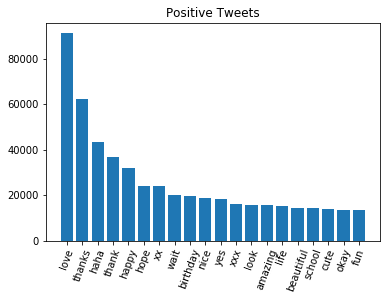

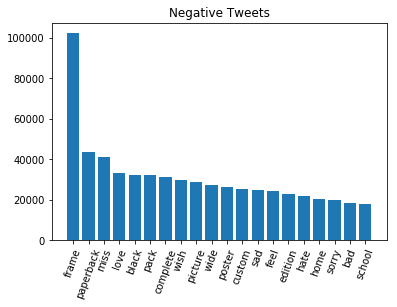

In [169]:
# Plotting the bar chart to indicate the top 20 words featured in positive tweets
plt.bar(range(len(top_w_pos)), [val[1] for val in top_w_pos], align='center')
plt.xticks(range(len(top_w_pos)), [val[0] for val in top_w_pos])
plt.xticks(rotation=70)
plt.title('Positive Tweets')
plt.show()

# Plotting the bar chart to indicate the top 20 words featured in negative tweets
plt.bar(range(len(top_w_neg)), [val[1] for val in top_w_neg], align='center')
plt.xticks(range(len(top_w_neg)), [val[0] for val in top_w_neg])
plt.xticks(rotation=70)
plt.title('Negative Tweets')
plt.show()

# Word2Vec Embeddings

In [2]:
import pandas as pd

from gensim.models import Word2Vec
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

Loading the data for which we will train word embeddings

In [3]:
data = pd.DataFrame()
data = pd.read_csv('Datasets/Tweets.csv', encoding = 'utf-8')

Pre-processing the data before training Word2Vec model

In [4]:
#create empty list
tweet_data_list = []

indv_lines = data['Tweet'].values.tolist()
for line in indv_lines:
    
    #create word tokens as well as remove punctuation in one go
    rem_tok_punc = RegexpTokenizer(r'\w+')
    
    tokens = rem_tok_punc.tokenize(line)
    
    #convert the words to lower case
    words = [w.lower() for w in tokens]
    
    #invoke all the English stopwords
    stop_word_list = set(stopwords.words('english'))
    
    #remove stop words
    words = [w for w in words if not w in stop_word_list]
    
    #remove <user> and <url>
    useless = ['user', 'url']
    words = [w for w in words if not w in useless]
    
    #append words in the tweet_data_list list
    tweet_data_list.append(words)

In [5]:
print(len(tweet_data_list))

2500000


Training the Word2Vec model

In [6]:
# Dimension of the word embedding
embed_dim = 100

# Train Word2Vec model
model = Word2Vec(sentences = tweet_data_list, size = embed_dim, workers = 4, min_count = 1)

Saving the Word2Vec embeddings to a txt file

In [7]:
#Save word embedding model
model_file = 'Embeddings/Word2Vec_embedding.txt'
model.wv.save_word2vec_format(model_file, binary=False)

## Exploring the vectors in the Word2Vec embeddings

In [8]:
# Finding similar words
model.wv.most_similar('happy')

[('happpy', 0.6342273950576782),
 ('happyyy', 0.6260827779769897),
 ('celebrating', 0.6031116247177124),
 ('thatwillmakemyday', 0.5964998006820679),
 ('citttayyy', 0.5951326489448547),
 ('springville', 0.59418785572052),
 ('haapppy', 0.5933533906936646),
 ('haaappy', 0.5925433039665222),
 ('happyy', 0.5857408046722412),
 ('haappy', 0.5857073664665222)]

In [9]:
#Performing some mathematics on word vectors queen + man - woman = ?
model.wv.most_similar_cosmul(positive=['queen','man'], negative=['woman'])

[('king', 0.8417046666145325),
 ('ilalagay', 0.8361548781394958),
 ('queens', 0.8310335278511047),
 ('eustis', 0.8294510841369629),
 ('eamon', 0.8168073296546936),
 ('ash', 0.8159782886505127),
 ('rocks', 0.8145322799682617),
 ('lion', 0.8141646981239319),
 ('lucic', 0.8018689155578613),
 ('jamond', 0.7928951382637024)]

In [20]:
#Finding the odd word out from the list of words given
print(model.wv.doesnt_match("england switzerland france germany usa".split()))

usa


## Visualising the word embedding vectors

In [11]:
# Importing bokeh libraries for showing how words of similar context are grouped together
import bokeh.plotting as bp

from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

In [12]:
VocabKeys = []
for key in model.wv.vocab.keys():
    VocabKeys.append(key)


#Defining the chart
output_notebook()
plot_chart = bp.figure(plot_width=700, plot_height=600, title="A Plot of 5000 Word Vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

#Extracting the list of word vectors, limiting to 5000, each is of 200 dimensions
word_vectors = [model[w] for w in VocabKeys[:5000]]

Loading BokehJS ...

/Users/victoriaadcock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


## Reducing dimensionality by converting the vectors to 2d vectors

## TSNE

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# Storing data in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = VocabKeys[:5000]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.014s...
[t-SNE] Computed neighbors for 5000 samples in 3.886s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.144745
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.456116
[t-SNE] KL divergence after 1000 iterations: 2.209688


In [15]:
# Corresponding word appears when you hover on the data point.
plot_chart.scatter(x='x', y='y', source=tsne_df)
hover = plot_chart.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_chart)

## PCA

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca_model = PCA(n_components=2, random_state=0)
pca_w2v = pca_model.fit_transform(word_vectors)

# Storing data in a dataframe
pca_df = pd.DataFrame(pca_w2v, columns=['x', 'y'])
pca_df['words'] = VocabKeys[:5000]

In [18]:
# Corresponding word appears when you hover on the data point.
plot_chart.scatter(x='x', y='y', source=pca_df)
hover = plot_chart.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_chart)